In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Devisri Mahalakshmi\Downloads\archive (19)\Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3]:
data = data.dropna()
features = data[['Annual Income (k$)' ,  'Spending Score (1-100)']]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [5]:
from sklearn.cluster import KMeans
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_


C:\Users\Devisri Mahalakshmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
print(data['Cluster'].value_counts())

2    123
1     39
0     38
Name: Cluster, dtype: int64


In [7]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(cluster_centers)


[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]


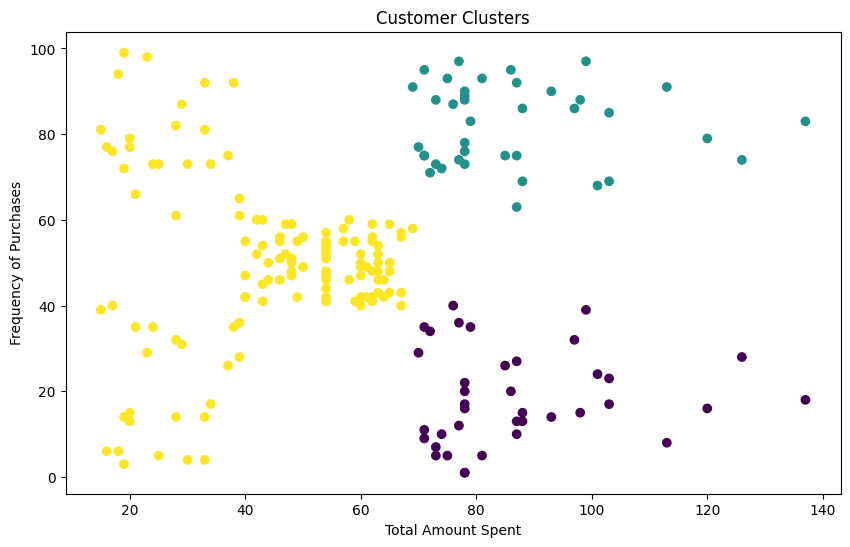

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency of Purchases')
plt.title('Customer Clusters')
plt.show()
